# Аналитика данных с помощью `pandas` и `matplotlib`

Андрей Гамов, BAE'26

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [5]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 32.2MB/s]


Начнем с необходимых приготовлений.

In [ ]:
%pip install mplfinance
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplfinance as mpf
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00


#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [7]:
coins = pd.read_csv('coins.csv', index_col=0)

Посмотрим что получилось

In [8]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

Чтобы найти число различных монет, представленных в датасете, можно использовать два столбца: symbol (тикер монеты) и name (название монеты). Нетрудно заметить, что в датасете представлены тикеры, используемые более, чем одной монетой (и нет монет, которые использовали более одного тикера):

In [9]:
symbols_names = {s: set(coins[coins.symbol == s].name) for s in set(coins.symbol)}
[item for item in symbols_names.items() if len(symbols_names[item[0]]) > 1]

[('KNC', {'KingN Coin', 'Kyber Network'}),
 ('ICN', {'Iconomi', 'iCoin'}),
 ('BTG', {'Bitcoin Gold', 'Bitgem'}),
 ('BTM', {'Bitmark', 'Bytom'})]

In [10]:
tickers = {s: set(coins[coins.name == s].symbol) for s in set(coins.name)}
[item for item in tickers.items() if len(tickers[item[0]]) > 1]

[]

Найдем отдельно число разных названий монет и число разных тикеров:


In [11]:
coins_number = coins.name.nunique()
symbols_number = coins.symbol.nunique()
coins_number, symbols_number

(70, 66)

В датасете представлено 70 криптовалют, которые используют 66 разных тикеров.




### 2. За какой период данные мы имеем? (0.4 балла)

Представленные данные охватывают период от 28.04.2013 до 06.06.2018


In [12]:
period_start, period_end = min(coins.index), max(coins.index)
period_start, period_end

('2013-04-28', '2018-06-06')

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

Выведем все строки с пропущенными данными:

In [13]:
coins[coins.isna().any(axis=1)]

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2014-08-05,0.002976,NaN,NaN,NaN,XLM,Stellar,0.002976,0.003387,0.002349,0.002440,3.031600e+04,7.725970e+05
2014-08-06,0.002373,NaN,NaN,NaN,XLM,Stellar,0.002373,0.003402,0.002266,0.002657,3.582000e+04,7.465540e+05
2014-08-07,0.002686,NaN,NaN,NaN,XLM,Stellar,0.002686,0.003042,0.002455,0.002501,1.428640e+05,9.769420e+05
2014-08-08,0.002493,NaN,NaN,NaN,XLM,Stellar,0.002493,0.003243,0.002493,0.002881,9.370800e+04,1.075820e+06
2014-08-09,0.002884,NaN,NaN,NaN,XLM,Stellar,0.002884,0.003710,0.002873,0.003481,2.335790e+05,1.261300e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-04,NaN,847.0,NaN,698.0,VEN,VeChain,4.060000,4.170000,3.830000,3.890000,9.283970e+07,2.135810e+09
2018-06-05,13.580000,NaN,NaN,NaN,EOS,EOS,13.580000,14.230000,12.970000,14.200000,1.445140e+09,1.217170e+10
2018-06-05,NaN,632.0,NaN,588.0,VEN,VeChain,3.890000,4.150000,3.800000,4.090000,8.376190e+07,2.047090e+09


Пропуски в данных дейстивтельно есть. Найдем число строк, в которых есть пропуски, для каждого столбца:

In [14]:
coins.isna().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Посмотрим также на то, пропуски в каких столбцах характерны для каждой из монет с пропусками:

In [15]:
na_sum = coins.set_index('name').isna().groupby('name').sum()
na_sum[(na_sum!=0).any(axis=1)]

,price,txCount,txVolume,activeAddresses,symbol,open,high,low,close,volume,market
name,,,,,,,,,,,
Aeternity,0,95,95,95,0,0,0,0,0,0,0
Augur,0,540,540,540,0,0,0,0,0,0,0
Bitcoin Cash,0,3,3,3,0,0,0,0,0,0,0
Bitcoin Gold,0,3,3,3,0,0,0,0,0,0,0
Bitgem,0,3,3,3,0,0,0,0,0,0,0
Bitmark,26,7,26,7,0,0,0,0,0,0,0
EOS,0,5,5,5,0,0,0,0,0,0,0
FunFair,0,17,17,17,0,0,0,0,0,0,0
Gnosis,0,1,1,1,0,0,0,0,0,0,0


Отсутствуют данные о количестве, объеме транзакций и числе их участников о средних ценах криптовалют за день, а также о средних ценах криптовалют за день. Данные с пропусками можно разделить на две группы: для первой характерно отсутствие данных в txCount, txVolume, activeAddresses, а для второй - в price и txVolume. Первый случай может быть объяснен отстуствием доступа к данным о транзакциям в определенные периоды по ряду технических причин (к примеру, в связи с [изменениями протоколов](https://blog.openzeppelin.com/augur-rep-token-critical-vulnerability-disclosure-3d8bdffd79d2) или [смарт-контрактов](https://blog.openzeppelin.com/augur-rep-token-critical-vulnerability-disclosure-3d8bdffd79d2)). При подсчете средней цены также могут использоваться данные об объеме транзакций за определенный период времени (они могут быть весами при подсчете взвешенного среднего), что может быть причиной возникновения пропусков из второй группы.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

Выведем строку, в которой содержится запись с самым высоким значением цены среди представленных в датасете:

In [16]:
coins[coins.price == max(coins.price)]

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


Самая высокая цена среди представленных монет была достигнута биткоином 17.12.2017: она равна $19475.80


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Сгруппируем наблюдения по названиям монет и просуммируем их суточные капитализации. Результат отсортируем в порядке убывания капитализации, чтобы увидеть нужные нам наблюдения в начале и конце получившегося датафрейма.

In [17]:
total_market_cap = coins.groupby('name').agg({'market':'sum'}).sort_values(by='market', ascending=False)
total_market_cap

,market
name,
Bitcoin,5.743947e+13
Ethereum,1.958822e+13
Bitcoin Cash,5.885986e+12
Litecoin,2.667419e+12
Cardano,1.769282e+12
...,...
Cortex,1.093502e+10
Bitmark,2.111718e+09
iCoin,1.146288e+08


Больше всего суммарная капитализация у Bitcoin, меньше всего - у KingN Coin.

На основании полученных данных построим круговую диаграмму:

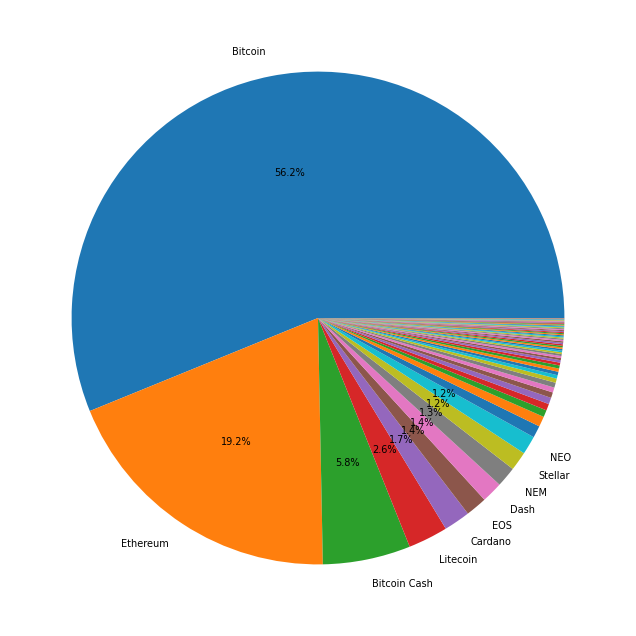

In [18]:
fig = plt.figure(figsize=(8,8))
names = list(total_market_cap.index)
plt.pie(total_market_cap.market, labels=[names[i] if total_market_cap.market[i]/
                                        total_market_cap.market.sum() >= 0.01 else ''
                                        for i in range(len(names))], # выведем названия только для монет с капиталиацией от 1% от общей и выше
       autopct=lambda x: f'{x:.1f}%' if x > 1 else None, textprops={'fontsize':7}) # с процентами сделаем то же, что и с названиями
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [19]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coins_period = coins[coins.symbol == symbol].loc[start_date:end_date].reset_index()
    ohlc = coins_period.loc[:, ['date', 'open', 'high', 'low', 'close']]
    ohlc.index = pd.DatetimeIndex(ohlc.date)
    mpf.plot(ohlc,
             type='candle',
             style='yahoo',
             figsize=(16.18, 10),
             title=f'Price of {symbol} from {start_date} to {end_date}')

Посмотрим, что получилось:

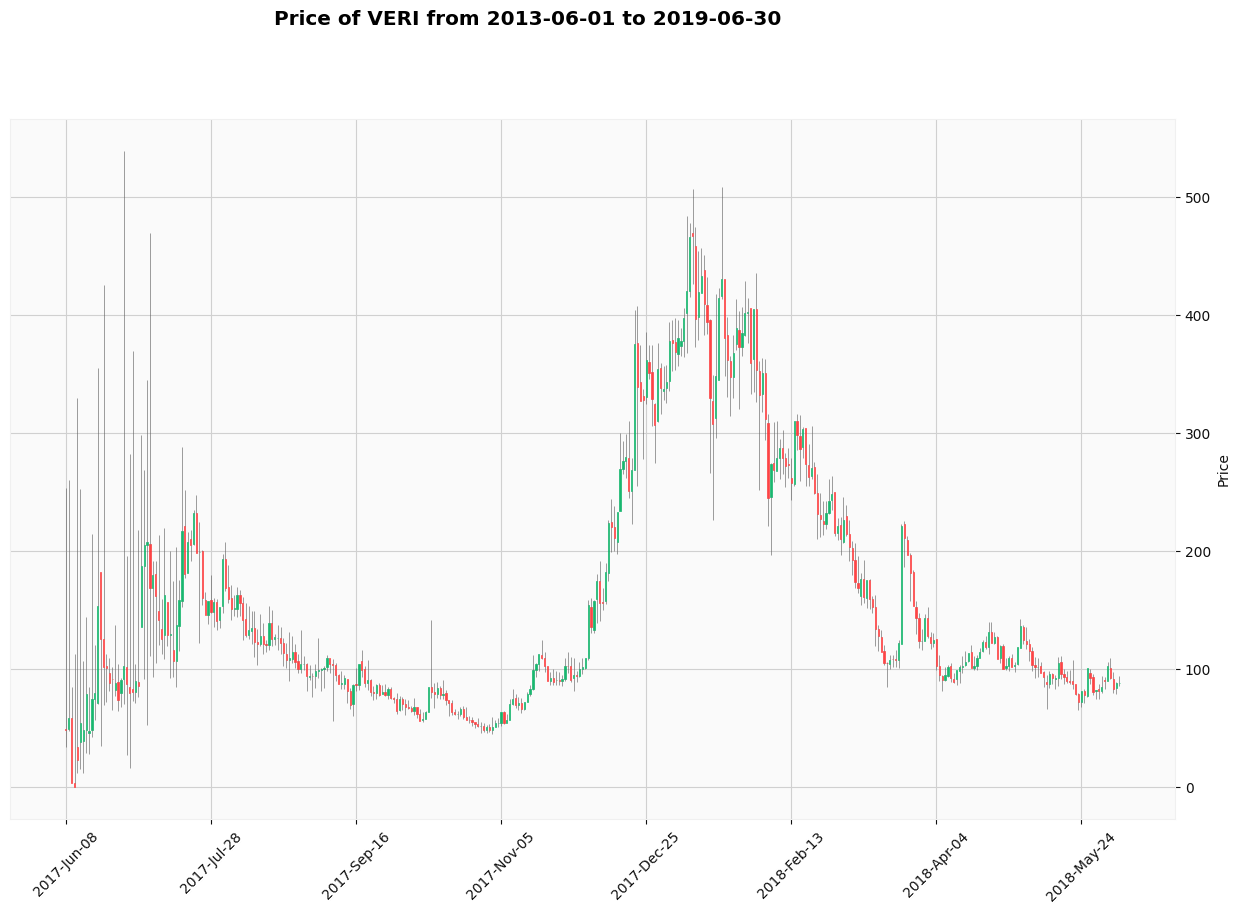

In [20]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [21]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coins['maximum'] = np.maximum(coins.open, coins.close)
    coins['pnd'] = coins.high/coins.maximum
    coins_period = coins[(coins.symbol == symbol)][start_date:end_date]
    res = coins_period[coins_period.pnd == max(coins_period.pnd)]
    return res.pnd

In [22]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

date
2017-11-29    1.142894
Name: pnd, dtype: float64

Сравним эти значения для разных монет с помощью графика:

In [23]:
coins_pnds = {symbol: float(find_most_severe_pump_and_dump(coins, symbol=symbol,
                                                           start_date='2013-04-28', end_date='2018-06-06').iloc[0]) for symbol in set(coins.symbol)}
coins_pnds = dict(sorted(coins_pnds.items(), key=lambda x: x[1], reverse=True))
coins_pnds = pd.DataFrame({'symbol': coins_pnds.keys(), 'pnd': coins_pnds.values()})
coins_pnds

,symbol,pnd
0,VERI,33.549254
1,DGB,32.119149
2,FUN,12.490562
3,TRX,9.651010
4,BTM,7.177933
...,...,...
61,CENNZ,1.177753
62,BNB,1.176080
63,NAS,1.175824
64,USDT,1.152381


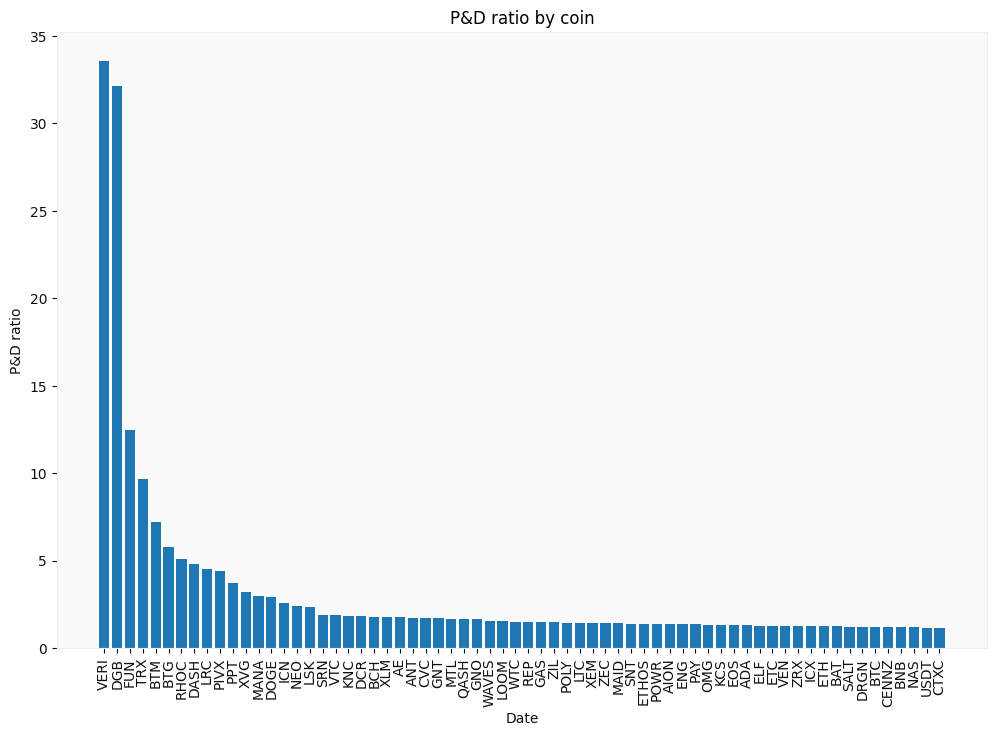

In [24]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.bar(coins_pnds.symbol, coins_pnds.pnd)
ax.set_xticks(np.arange(0, len(coins_pnds)), list(coins_pnds.symbol), rotation=90)
ax.set_title('P&D ratio by coin')
ax.set_xlabel('Date')
ax.set_ylabel('P&D ratio')
ax.grid(False)
plt.show()

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [25]:
def compute_roi(coins, investments, start_date, end_date):
    res = {key: 0 for key in investments.keys()}
    for key in res.keys():
      start_price = float(coins[(coins.index == start_date) & (coins.symbol == key)].price.iloc[0])
      end_price = float(coins[(coins.index == end_date) & (coins.symbol == key)].price.iloc[0])
      res[key] = (investments[key], (end_price - start_price)/start_price)

    return pd.DataFrame.from_dict(res, orient='index', columns=['investment', 'ROI'])

In [26]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

,investment,ROI
BTC,1000,0.005940
LTC,500,-0.118587


In [27]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

,investment,ROI
BTC,1000,57.765277
LTC,500,38.319355


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [28]:
def plot_bollinger_bands(coins, symbol, window, width):
    coins_symbol = coins[coins.symbol == symbol]
    price = coins_symbol.price
    rolling_avg = price.rolling(window).mean()
    st_dev = price.rolling(window).std()
    upper_band = rolling_avg + width * st_dev
    lower_band = rolling_avg - width * st_dev

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(price, color='black', label='price', linestyle='--')
    ax.plot(rolling_avg, color='blue', label='rolling avg.')
    ax.plot(upper_band, color='green', label='upper band')
    ax.plot(lower_band, color='red', label='lower band')
    ax.set_title(f'Bollinger bands for {symbol}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.show()

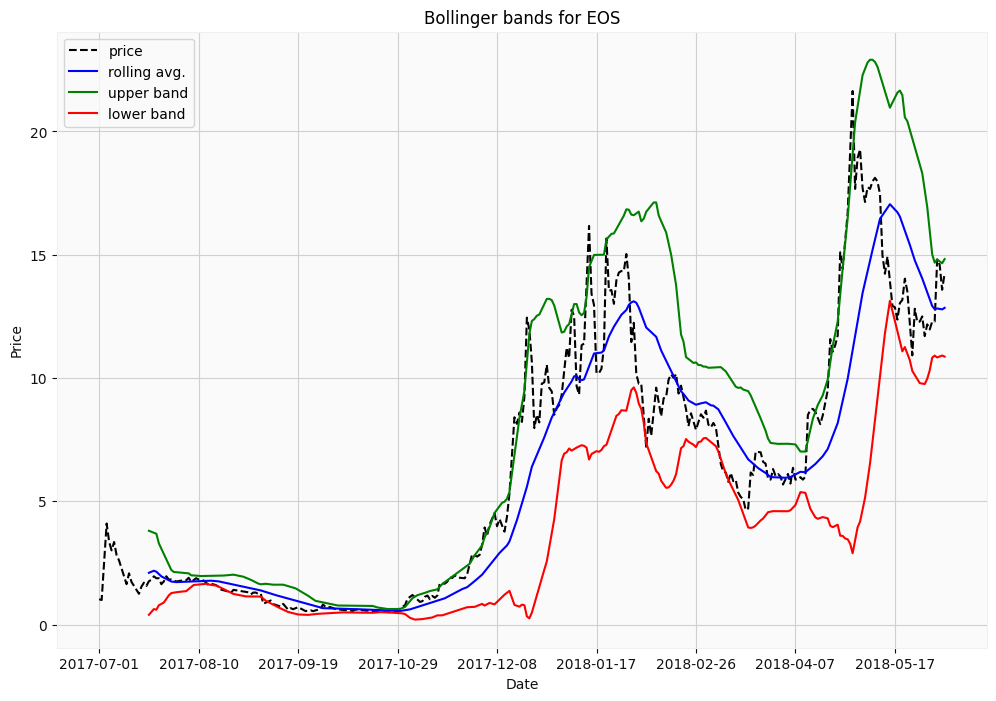

In [29]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Правило Боллинджера в целом выполняется - периоды выхода цены за пределы коридора редки, и при достижении границ она затем принимает значения выше нижней/ниже верхней границы.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [30]:
def plot_coins_capitalizations(coins, symbols, start_date):
    market_cap = pd.DataFrame(coins.loc[start_date:].groupby(['symbol']).volume.apply(lambda x: x)).reset_index()
    market_share = pd.DataFrame(coins.loc[start_date:].reset_index().groupby(['date']).agg({'volume' : 'sum'}))
    market_share.columns = ['total_cap']
    market_share['volume_combined'] = 0

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    for sym in symbols:
      data = market_cap[market_cap['symbol'] == sym].set_index('date').merge(market_share, on='date', how='right')
      ax1.plot(data.volume, label=sym)
      market_share[sym] = data.volume/data.total_cap * 100
      market_share['volume_combined'] += data.volume
      ax2.plot(data.volume/data.total_cap * 100, label=sym)


    ax1.plot(market_share.volume_combined, label='combined')
    market_share['share_combined'] = market_share.loc[:, symbols].sum(axis=1)
    ax2.plot(market_share.share_combined, label='combined')

    ax1.set_title(f'Market cap for selected coins starting from {start_date}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Market cap')
    ax1.legend(loc='best')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

    ax2.set_title(f'Shares of total crypto market cap for selected coins starting from {start_date}')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Market cap share, in %')
    ax2.legend(loc='best')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

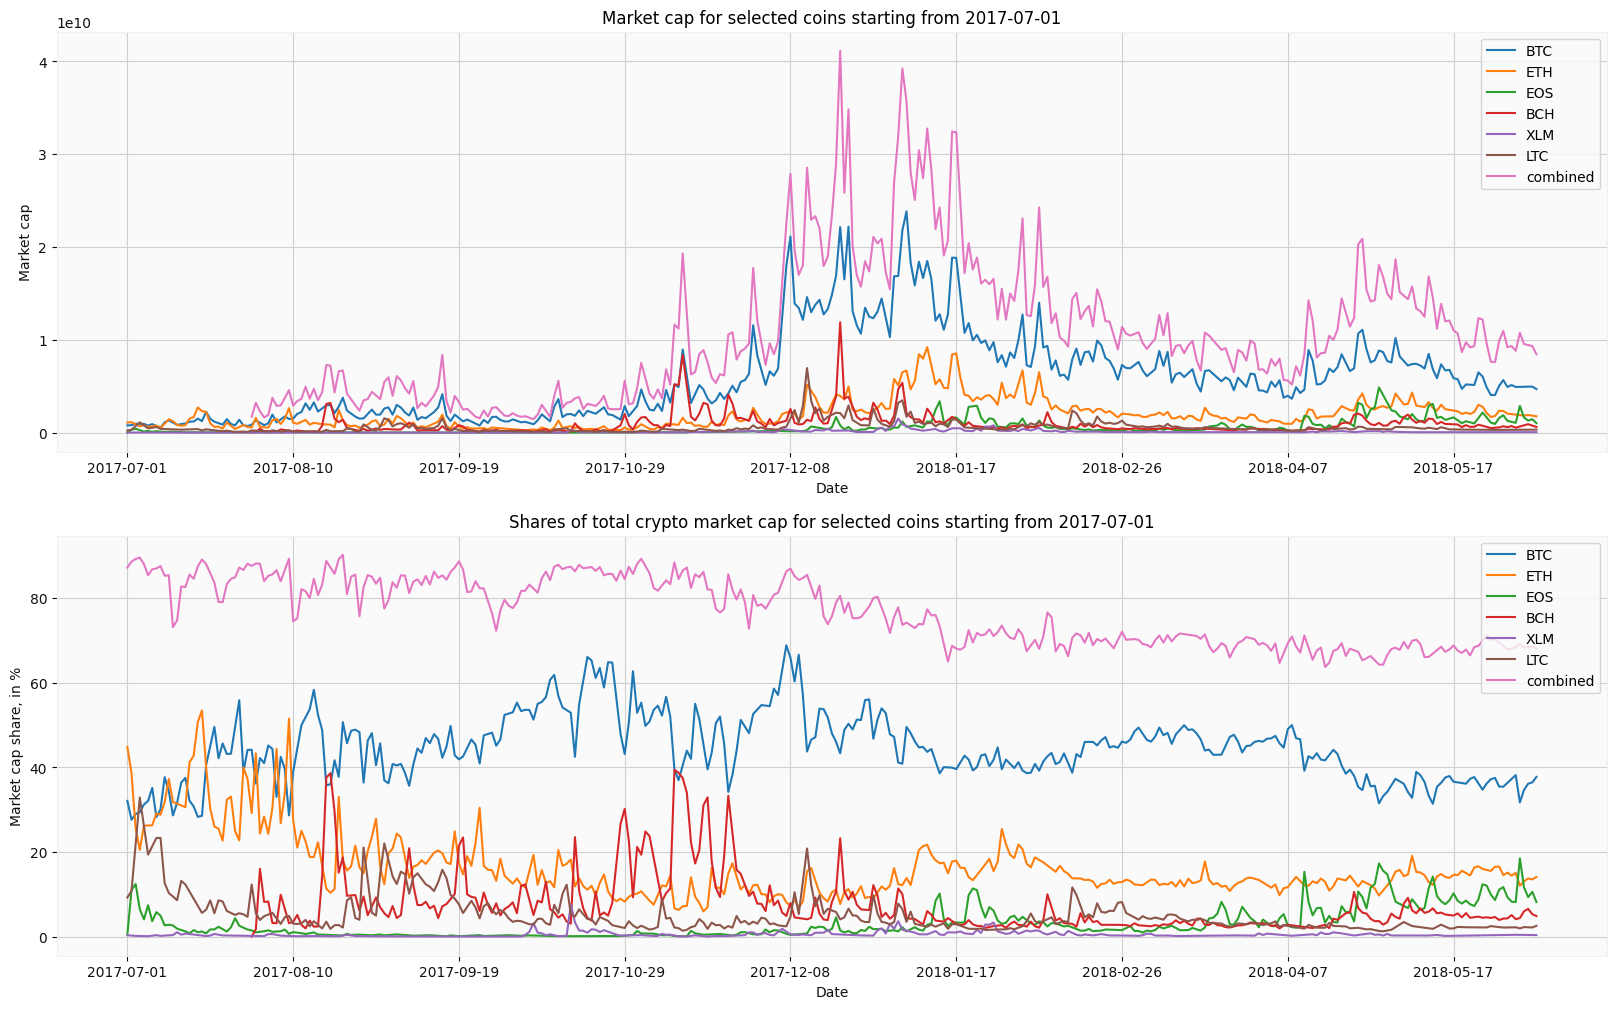

In [31]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как вы думаете, в чём причина такой зависимости?

Чаще всего доля капитализации альткойнов возрастает по мере снижения доли капитализации биткойна. На графике можно заметить несколько участков, подтверждающих это предположение: в июле-августе 2017 года рост доли капитализации Etherium сопровождался снижением доли Bitcion и наоборот, а в октябре-декабре произошла схожая ситуация с Bitcoin и Bitcoin Cash.

Проверим это предположение, рассчитав коэффициент корреляции между долями биткоина и представленных альткоинов

In [32]:
def btc_alt_corr(coins, symbols, start_date):
    market_cap = pd.DataFrame(coins.loc[start_date:].groupby(['symbol']).volume.apply(lambda x: x)).reset_index()
    market_share = pd.pivot_table(market_cap, values='volume', index='date', columns='symbol')
    market_share['total'] = market_share.sum(axis=1)
    market_share['altcoins'] = market_share.loc[:, [item for item in symbols if item != 'BTC']].sum(axis=1)
    market_share = market_share.apply(lambda x: x/market_share.total * 100, axis=0, result_type='broadcast')

    return market_share.loc[:, ['BTC', 'altcoins']].corr()

In [33]:
btc_alt_corr(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

symbol,BTC,altcoins
symbol,,
BTC,1.000000,-0.606099
altcoins,-0.606099,1.000000


Действительно, наблюдается отрицательная взаимосвязь между долями капитализации биткойна и альткойнов.  Причина этого факта, вероятнее всего, заключается в том, что биткоины и альткоины являются субститутами: если последние, по мнению трейдеров, в перспективе вырастут в цене сильнее, чем биткоин, они сосредоточат большую часть операций именно на альтоинах, и наоборот.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [34]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    coins.index = pd.to_datetime(coins.index)
    date = np.datetime64(date)
    start = date - np.timedelta64(window)

    market_cap = pd.DataFrame(coins.loc[start:date].groupby(['symbol']).volume.
                              apply(lambda x: x)).reset_index()
    market_share = pd.pivot_table(market_cap, values='volume', index='date', columns='symbol')
    market_share['total'] = market_share.sum(axis=1)
    market_share = market_share.apply(lambda x: x/market_share.total * 100, axis=0, result_type='broadcast')
    market_share_avg = market_share.ewm(alpha=alpha).mean().reset_index()

    data = market_share_avg.loc[:, symbols]
    corr_df = data.corr()
    return corr_df


In [35]:
calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

symbol,BTC,ETH,EOS,BCH,XLM,LTC,ADA
symbol,,,,,,,
BTC,1.000000,-0.363347,-0.746399,0.473071,-0.653497,-0.715543,-0.630737
ETH,-0.363347,1.000000,0.032711,-0.749401,0.044518,0.587770,0.023339
EOS,-0.746399,0.032711,1.000000,-0.481392,0.880740,0.248823,0.789330
BCH,0.473071,-0.749401,-0.481392,1.000000,-0.549330,-0.443280,-0.534588
XLM,-0.653497,0.044518,0.880740,-0.549330,1.000000,0.358850,0.955878
LTC,-0.715543,0.587770,0.248823,-0.443280,0.358850,1.000000,0.326095
ADA,-0.630737,0.023339,0.789330,-0.534588,0.955878,0.326095,1.000000


In [36]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

symbol,BTC,ETH,EOS,BCH,XLM,LTC,ADA
symbol,,,,,,,
BTC,1.00,-0.36,-0.75,0.47,-0.65,-0.72,-0.63
ETH,-0.36,1.00,0.03,-0.75,0.04,0.59,0.02
EOS,-0.75,0.03,1.00,-0.48,0.88,0.25,0.79
BCH,0.47,-0.75,-0.48,1.00,-0.55,-0.44,-0.53
XLM,-0.65,0.04,0.88,-0.55,1.00,0.36,0.96
LTC,-0.72,0.59,0.25,-0.44,0.36,1.00,0.33
ADA,-0.63,0.02,0.79,-0.53,0.96,0.33,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [37]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

symbol,BTC,ETH,EOS,BCH,XLM,LTC,ADA
symbol,,,,,,,
BTC,1.00,-0.79,-0.91,-0.69,0.64,-0.49,-0.77
ETH,-0.79,1.00,0.73,0.25,-0.34,0.59,0.55
EOS,-0.91,0.73,1.00,0.67,-0.39,0.28,0.90
BCH,-0.69,0.25,0.67,1.00,-0.36,-0.17,0.48
XLM,0.64,-0.34,-0.39,-0.36,1.00,-0.68,-0.26
LTC,-0.49,0.59,0.28,-0.17,-0.68,1.00,0.25
ADA,-0.77,0.55,0.90,0.48,-0.26,0.25,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

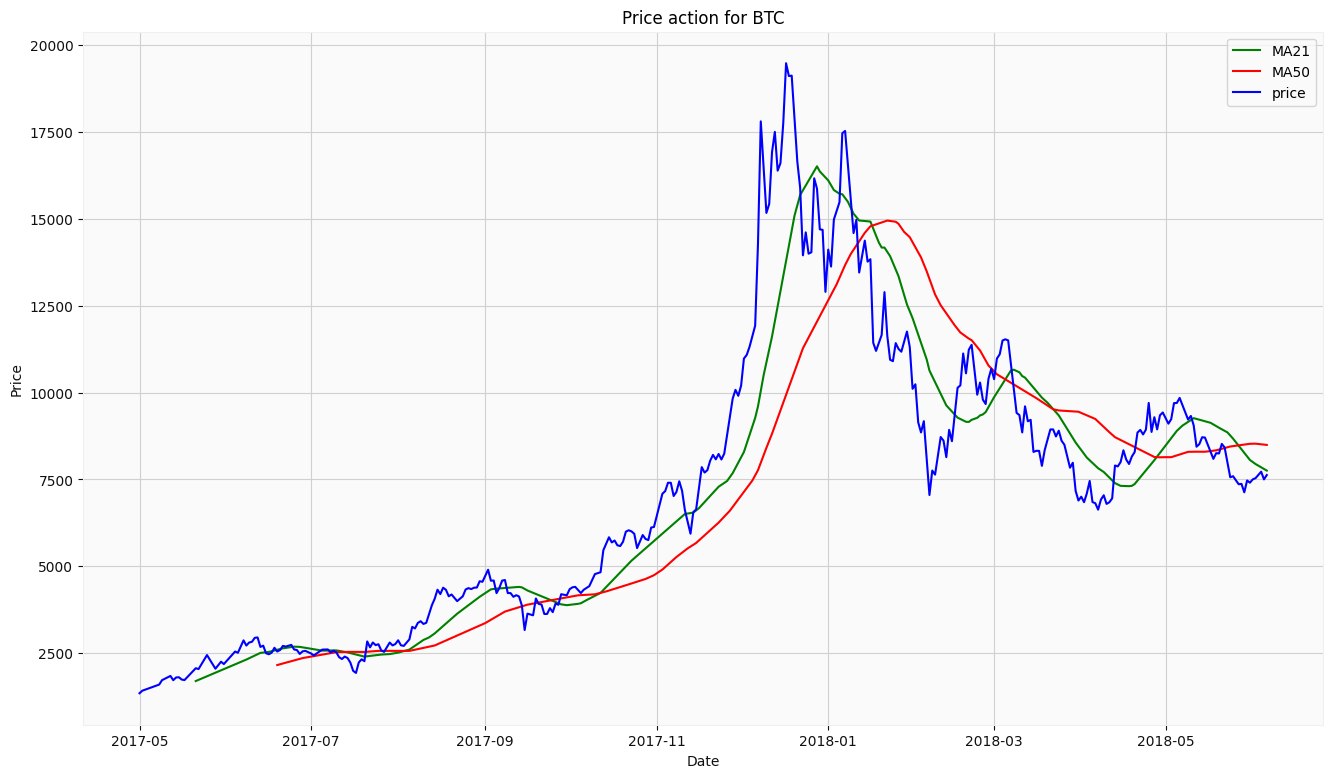

In [38]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [280]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date, buy_sell_display=False # добавим еще одну способность - о ней ниже
):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    close = coin['close']
    leading_mean = close.rolling(window=lead_window).mean()
    lagging_mean = close.rolling(window=lag_window).mean()

    ### напишем multiplier для стратегии удерживания
    multiplier = close/close.shift(1)
    multiplier_hold_cum = multiplier.cumprod()

    ### реализуем два варианта второй стратегии с разными условиями продажи:
    ### если (leading_mean - lagging_mean)/close < -threshold и если (leading_mean - lagging_mean)/close < 0

    threshold_check_high = ((leading_mean - lagging_mean)/close > threshold).to_dict()
    threshold_check_low_1 = ((leading_mean - lagging_mean)/close < -threshold).to_dict()
    threshold_check_low_2 = ((leading_mean - lagging_mean)/close < 0).to_dict()

    '''
    buy = 1: покупаем акций на всю сумму, которая есть на руках
    hold = 0: держим при себе сумму на руках
    sell = -1: продаем все акции

    полагаем, что по состоянию на start_date на руках ничего нет, а стоимость купленных акций нормирована и равна 1
    соответственно, итоговый multiplier = price + on_hand (и то, и другое - наш доход)
    '''

    coin['buy_sell_1'] = pd.Series(threshold_check_high).astype(int) - pd.Series(threshold_check_low_1).astype(int)
    coin['buy_sell_2'] = pd.Series(threshold_check_high).astype(int) - pd.Series(threshold_check_low_2).astype(int)
    invested_1 = pd.Series([1 for _ in range(len(coin))], coin.index)
    invested_2 = pd.Series([1 for _ in range(len(coin))], coin.index)
    on_hand_1 = pd.Series([0 for _ in range(len(coin))], coin.index)
    on_hand_2 = pd.Series([0 for _ in range(len(coin))], coin.index)


    for day in pd.date_range(start_date, min(pd.to_datetime(end_date), pd.to_datetime(coin.index[-1]))-np.timedelta64(1, 'D'), freq='D'):
      one = np.timedelta64(1, 'D') # если есть данные о close по дню, то действовать можем только на следующий

      if coin['buy_sell_1'].loc[day] == 1: #buy
        invested_1.loc[day+one] = invested_1.loc[day] + on_hand_1.loc[day]
        invested_1.loc[day+one] *= multiplier.loc[day+one]
        on_hand_1.loc[day+one] = 0
      elif coin['buy_sell_1'].loc[day] == 0: #hold
        invested_1.loc[day+one] = invested_1.loc[day] * multiplier.loc[day+one]
        on_hand_1.loc[day+one] = on_hand_1.loc[day]
      elif coin['buy_sell_1'].loc[day] == -1: #sell
        on_hand_1.loc[day+one] = on_hand_1.loc[day] + invested_1.loc[day] * multiplier.loc[day+one]
        invested_1.loc[day+one] = 0

      if coin['buy_sell_2'].loc[day] == 1: #buy
        invested_2.loc[day+one] = invested_2.loc[day] + on_hand_2.loc[day]
        invested_2.loc[day+one] *= multiplier.loc[day+one]
        on_hand_2.loc[day+one] = 0
      elif coin['buy_sell_2'].loc[day] == 0: #hold
        invested_2.loc[day+one] = invested_2.loc[day]* multiplier.loc[day+one]
        on_hand_2.loc[day+one] = on_hand_2.loc[day]
      elif coin['buy_sell_2'].loc[day] == -1: #sell
        on_hand_2.loc[day+one] = on_hand_2.loc[day] + invested_2.loc[day] * multiplier.loc[day+one]
        invested_2.loc[day+one] = 0


    strategy_1 = invested_1 + on_hand_1
    strategy_2 = invested_2 + on_hand_2

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

    ax1.set_title('Multiplier for {}'.format(symbol))
    ax1.plot(multiplier_hold_cum, color='green', label='hold')
    ax1.plot(strategy_2, color='red', label='strategy, sell if < 0')
    ax1.plot(strategy_1, color='blue', label='strategy, sell if < -threshold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Multiplier')
    ax1.legend(loc='best')
    ax1.grid(True)

    ax2.set_title('Price action for {}'.format(symbol))
    ax2.plot(leading_mean, color='green', label='MA{}'.format(lead_window))
    ax2.plot(lagging_mean, color='red', label='MA{}'.format(lag_window))
    ax2.plot(close, color='blue', label='price')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price')
    ax2.legend(loc='best')
    ax2.grid(True)

    ### обозначим зеленым участки графика, на которых стратегия рекомендует покупать: (leading_mean - lagging_mean)/close  > threshold
    bounds_positive = []
    bound = []
    for key, value in threshold_check_high.items():
      if value and not threshold_check_high.get(key-np.timedelta64(1, 'D'), False):
        bound.append(key)
      if value and not threshold_check_high.get(key+np.timedelta64(1, 'D'), False):
        bound.append(key)
      if len(bound) >= 2:
        bounds_positive.append(bound)
        bound = []

    ### обозначим красным участки графика, на которых стратегия рекомендует продавать: (leading_mean - lagging_mean)/close < -threshold
    bounds_negative = []
    bound = []
    for key, value in threshold_check_low_1.items():
      if not value and threshold_check_low_1.get(key-np.timedelta64(1, 'D'), False):
        bound.append(key)
      if not value and threshold_check_low_1.get(key+np.timedelta64(1, 'D'), False):
        bound.append(key)
      if len(bound) >= 2:
        bounds_negative.append(bound)
        bound = []

    if buy_sell_display:
      for b in bounds_positive:
        ax2.axvspan(b[0], b[1], facecolor='g', alpha=0.5)
      for b in bounds_negative:
        ax2.axvspan(b[0], b[1], facecolor='r', alpha=0.5)

    plt.show()


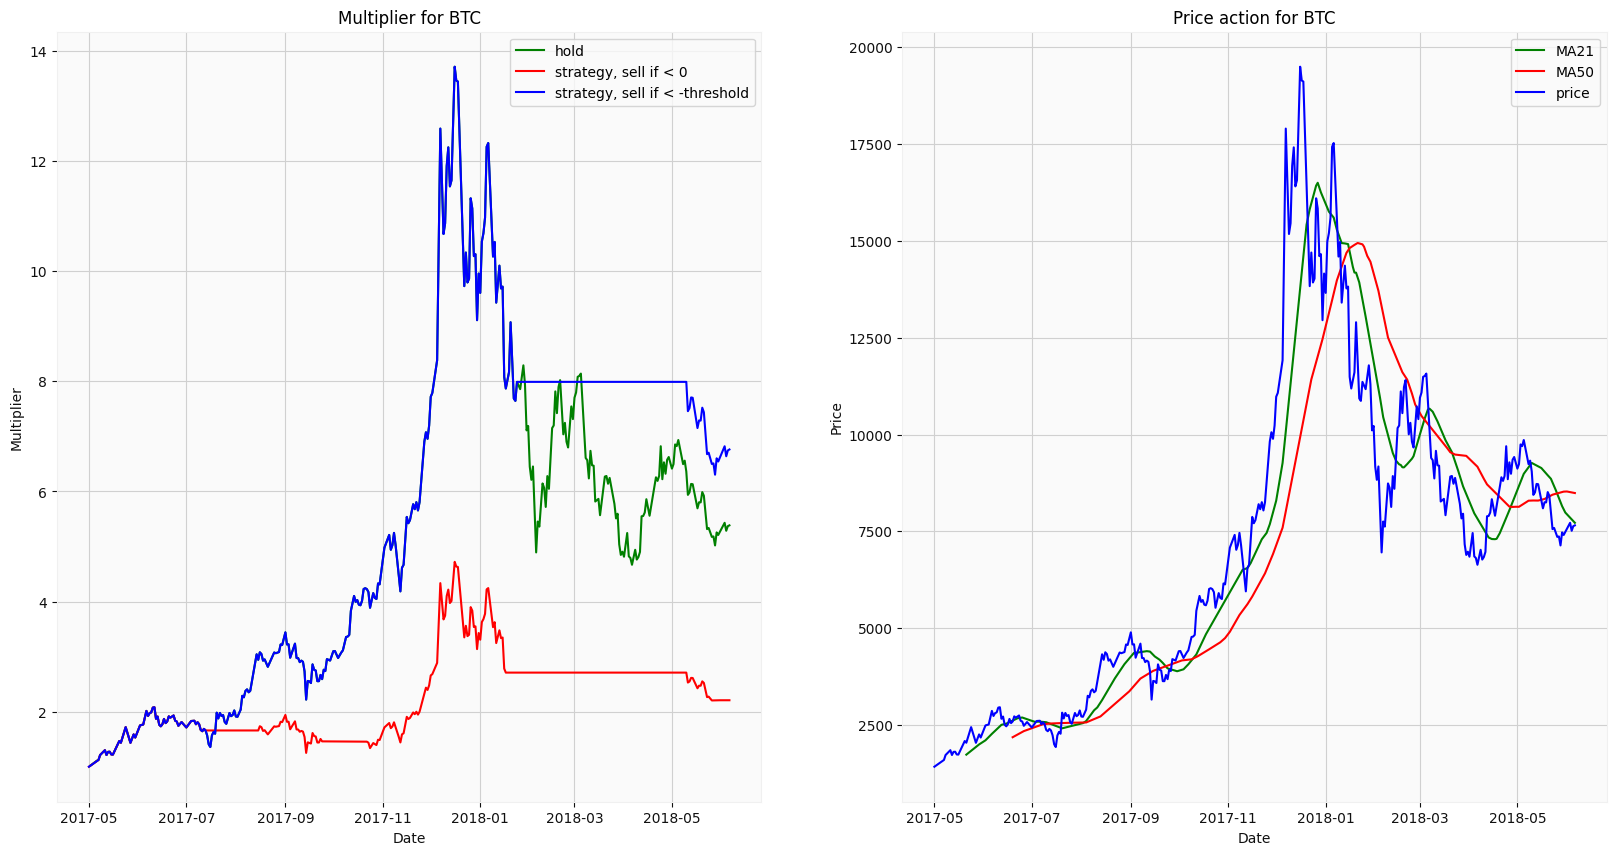

In [285]:
plot_moving_averages_strategy(
    coins=coins,
    symbol='BTC',
    lead_window=21,
    lag_window=50,
    threshold=0.1,
    start_date='2017-05-01',
    end_date='2018-08-01')

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
'''
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

display_button = ipywidgets.Checkbox(
    value=False,
    description='buy/sell display',
    disabled=False,
    indent=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider,
    buy_sell_display=display_button
)
'''

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date, buy_sell_display=False)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

В целом стратегия, основанная на скользящих средних, может быть применима, если цены растут не слишком быстро (как, например, в самом первом случае с 2017-05-01 по 2018-06-06 - вариант стратегии с threshold на продажу выступает лучше простого инвестирования). Тем не менее, в случае резких колебаний цен вроде криптобума 2017 года стратегия выступает хуже инвестирования и удержания, так как скользящее среднее менее восприимчиво к резкому росту/падению. Вероятно, стратегия может проявить себя на менее волатильном рынке, однако это предположение требует проверки

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.